In [24]:
import numpy as np

# Define the grid world
grid_size = 4
rewards = np.zeros((grid_size, grid_size))

# Place reward pots at specified positions
rewards[0, 0] = 10  # example reward at top-left corner
rewards[3, 3] = 1   # example reward at bottom-right corner

# Define actions (up, down, left, right)
actions = ['U', 'D', 'L', 'R']

# Define transition dynamics (deterministic)
def transition(state, action):
    i, j = state
    if action == 'U':
        return max(i - 1, 0), j
    elif action == 'D':
        return min(i + 1, grid_size - 1), j
    elif action == 'L':
        return i, max(j - 1, 0)
    elif action == 'R':
        return i, min(j + 1, grid_size - 1)


In [25]:
# Initialize value function and policy
value_function = np.zeros((grid_size, grid_size))
policy = np.random.choice(actions, (grid_size, grid_size))

# Define discount factor
gamma = 0.9

def policy_evaluation(policy, value_function, rewards, gamma=0.9, theta=1e-6):
    while True:
        delta = 0
        for i in range(grid_size):
            for j in range(grid_size):
                v = value_function[i, j]
                new_state = transition((i, j), policy[i, j])
                value_function[i, j] = rewards[i, j] + gamma * value_function[new_state]
                delta = max(delta, abs(v - value_function[i, j]))
        if delta < theta:
            break
    return value_function

def policy_improvement(value_function, rewards, gamma=0.9):
    policy_stable = True
    for i in range(grid_size):
        for j in range(grid_size):
            old_action = policy[i, j]
            action_values = []
            for action in actions:
                new_state = transition((i, j), action)
                action_values.append(rewards[i, j] + gamma * value_function[new_state])
            best_action = actions[np.argmax(action_values)]
            policy[i, j] = best_action
            if old_action != best_action:
                policy_stable = False
    return policy, policy_stable

def policy_iteration(policy, value_function, rewards, gamma=0.9):
    while True:
        value_function = policy_evaluation(policy, value_function, rewards, gamma)
        policy, policy_stable = policy_improvement(value_function, rewards, gamma)
        if policy_stable:
            break
    return policy, value_function

# Perform policy iteration
optimal_policy, optimal_value_function = policy_iteration(policy, value_function, rewards, gamma)


In [26]:
def display_policy(policy):
    policy_symbols = {'U': '↑', 'D': '↓', 'L': '←', 'R': '→'}
    for i in range(grid_size):
        for j in range(grid_size):
            print(policy_symbols[policy[i, j]], end=' ')
        print()

print("Optimal Policy:")
display_policy(optimal_policy)


Optimal Policy:
↑ ← ← ← 
↑ ↑ ↑ ↑ 
↑ ↑ ↑ ↑ 
↑ ↑ ↑ ↑ 


Loop detected! Terminating path visualization.


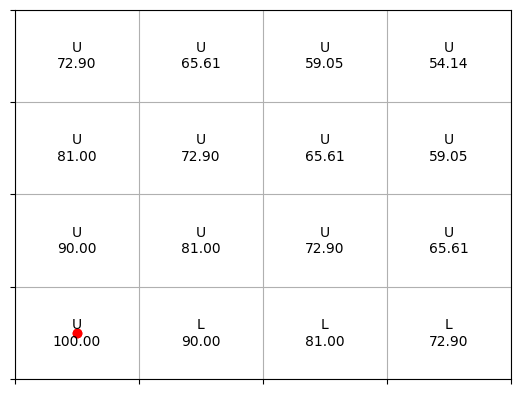

In [27]:
import matplotlib.pyplot as plt

def visualize_path(policy, start=(0, 0), goal=(3, 3)):
    path = [start]
    current_state = start
    visited = set()
    while current_state != goal:
        if current_state in visited:
            print("Loop detected! Terminating path visualization.")
            break
        visited.add(current_state)
        current_state = transition(current_state, policy[current_state])
        path.append(current_state)
    return path

path = visualize_path(optimal_policy)

# Visualize the grid world and the path taken by the agent
fig, ax = plt.subplots()
ax.set_xlim(-0.5, grid_size - 0.5)
ax.set_ylim(-0.5, grid_size - 0.5)
ax.set_xticks(np.arange(-0.5, grid_size, 1))
ax.set_yticks(np.arange(-0.5, grid_size, 1))
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.grid(True)

for i in range(grid_size):
    for j in range(grid_size):
        ax.text(j, i, f"{optimal_policy[i, j]}\n{optimal_value_function[i, j]:.2f}", ha='center', va='center')

path_x, path_y = zip(*path)
ax.plot(path_y, path_x, 'ro-')  # path

plt.show()
